In [6]:
from Hilbert2D import Hilbert2D
from Hilbert3D import Hilbert3D

# 2D Hilbertova křivka 

## Test mezivýpočtů pro výpočet bodu křivky 

In [7]:

h2d = Hilbert2D(15)

Q = h2d.dec_to_quarter(0.2)
print("Quarter Q:", Q)

e0, dj = h2d.ej_and_dj_counter(Q)
result = h2d.calculate_point(e0, dj, Q)
print("Calculated point:", result)


Quarter Q: [0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0]
Calculated point: [[0.20001221]
 [0.40002441]]


In [8]:

h = [2, 0, 3]
e0, dj = h2d.ej_and_dj_counter(h)
print("e0:", e0)
print("dj:", dj)

result = h2d.calculate_point(e0, dj, h)
print("Point from [2,0,3]:", result)

e0: [0. 0. 1.]
dj: [0. 0. 1.]
Point from [2,0,3]: [[0.625]
 [0.75 ]]


##  Hledání minima za využití algoritmu z knihovny scipy.optimize

In [9]:
print("Opravdové minimum f = 1.0")
for n in [2,3,4,5,6,7,8,25]:
    h2d = Hilbert2D(10)
    t_min, h_min, f_min = h2d.find_minimum_mapped(n,0,1,0,1,0)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}),  f = {f_min:.6f}")

Opravdové minimum f = 1.0
precision=  2  =>  t = 0.387500,  h(t) = (0.3000, 0.7500),  f = 1.001250
precision=  3  =>  t = 0.375001,  h(t) = (0.2500, 0.7500),  f = 1.002501
precision=  4  =>  t = 0.378125,  h(t) = (0.3000, 0.7500),  f = 1.001250
precision=  5  =>  t = 0.377539,  h(t) = (0.3000, 0.7812),  f = 1.003301
precision=  6  =>  t = 0.376954,  h(t) = (0.2812, 0.7813),  f = 1.003480
precision=  7  =>  t = 0.378661,  h(t) = (0.2968, 0.7500),  f = 1.001255
precision=  8  =>  t = 0.382246,  h(t) = (0.3286, 0.7852),  f = 1.004034
precision= 25  =>  t = 0.378922,  h(t) = (0.3125, 0.7539),  f = 1.001531


In [10]:

print("Opravdové minimum f = -1.0")
for n in [2,3,4,5,6,7,8,10,11,12,13]:
    h2d = Hilbert2D(10)
    t_min, h_min, f_min = h2d.find_minimum_mapped(n,-5,5,-5,5,1)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}),  f = {f_min:.6f}")

Opravdové minimum f = -1.0
precision=  2  =>  t = 0.633790,  h(t) = (2.8516, 2.5000),  f = 4.552424
precision=  3  =>  t = 0.382803,  h(t) = (-2.5000, 3.1242),  f = 2.711152
precision=  4  =>  t = 0.367132,  h(t) = (-3.1250, 3.1339),  f = 3.700411
precision=  5  =>  t = 0.361333,  h(t) = (-2.8141, 3.4375),  f = 4.136436
precision=  6  =>  t = 0.361573,  h(t) = (-2.8131, 3.2812),  f = 0.947096
precision=  7  =>  t = 0.361636,  h(t) = (-2.8164, 3.2031),  f = 0.215062
precision=  8  =>  t = 0.361650,  h(t) = (-2.8154, 3.1641),  f = 0.046597
precision= 10  =>  t = 0.361653,  h(t) = (-2.8125, 3.1421),  f = 0.006380
precision= 11  =>  t = 0.361653,  h(t) = (-2.8125, 3.1398),  f = 0.004590
precision= 12  =>  t = 0.361652,  h(t) = (-2.8223, 3.1445),  f = 0.016368
precision= 13  =>  t = 0.361652,  h(t) = (-2.8223, 3.1445),  f = 0.016368


In [11]:
print("Opravdové minimum f = 0.0")
for n in [2,3,4,5,6,7,8]:
    h2d = Hilbert2D(10)
    t_min, h_min, f_min = h2d.find_minimum_mapped(n,-10,10,-10,10,2)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}),  f = {f_min:.6f}")

Opravdové minimum f = 0.0
precision=  2  =>  t = 0.620192,  h(t) = (4.6154, 5.0000),  f = 0.961538
precision=  3  =>  t = 0.625000,  h(t) = (5.0000, 5.0001),  f = 1.000011
precision=  4  =>  t = 0.531251,  h(t) = (2.5003, 2.5000),  f = 0.250027
precision=  5  =>  t = 0.530950,  h(t) = (2.5000, 2.3077),  f = 0.240385
precision=  6  =>  t = 0.531249,  h(t) = (2.5011, 2.5000),  f = 0.250109
precision=  7  =>  t = 0.531190,  h(t) = (2.5000, 2.3455),  f = 0.240756
precision=  8  =>  t = 0.557208,  h(t) = (0.2968, 2.5781),  f = 1.383801


## Hledání minima za pomoci Hoelderova algoritmu

## Pro vlastní funkci


    Iterace n  Rozdíl Hoelder  Rozdíl alg z lib
0           1        0.020000          0.020000
1           2        0.001251          0.001250
2           3        0.002578          0.002501
3           4        0.000086          0.001250
4           5        0.000118          0.003301
5           6        0.000089          0.003480
6           7        0.000173          0.001255
7           8        0.000097          0.004034
8           9        0.000125          0.003553
9          10        0.000036          0.001426
10         11        0.000211          0.003451
11         12        0.000058          0.003408
12         13        0.000132          0.003491
13         14        0.000231          0.003633
14         15        0.000054          0.001320
15         16        0.000018          0.001782
16         17        0.000193          0.003514
17         18        0.000049          0.003525
18         19        0.000066          0.003523
19         20        0.000079          0

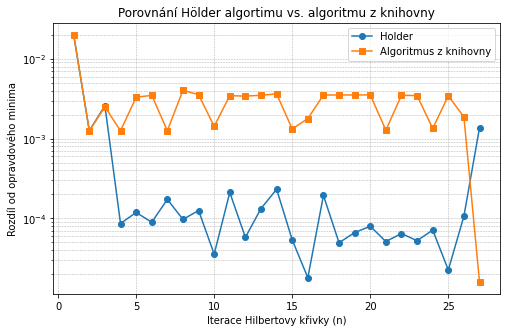

In [12]:
h2d = Hilbert2D(50)

H = 2 * 1.4142 * 5**(1/2)
r = 1.1
eps = 1e-5
N_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
max_iter = 100

df = h2d.compare_algorithms(H, r, eps, max_iter, N_vals, 0, 1, 0, 1, 0, 1.0)

In [13]:
H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,10,20,25] 
max_iter = 100
print("Opravdové minimum f = 1.0")
for n in N:
    t_min, f_min, x_min, y_min = h2d.Holder_algorithm_mapped(H, r, eps, max_iter,n,0,1,0,1,0)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Opravdové minimum f = 1.0
Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (0.30076476213796566, 0.5)
  Hodnota f: 1.0200002924305638
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (0.29866031731776377, 0.75)
  Hodnota f: 1.0012508973748446
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (0.25, 0.7515336645917725)
  Hodnota f: 1.0025778592931287
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (0.3125, 0.7039323193752471)
  Hodnota f: 1.0000858565678346
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (0.3089599213942549, 0.6875)
  Hodnota f: 1.0001182650956957
----------------------------------------
Iterace hilbertovy křivky: 6
  Souřadnice (x,y): (0.3125, 0.6953252414464153)
  Hodnota f: 1.000089051683767
----------------------------------------
Iterace hilbertovy křivky: 7
  Souřadnice (x,y): (0.2862610189532404, 0.68

## Pro Himmelblauovu funkci 

    Iterace n  Rozdíl Hoelder  Rozdíl alg z lib
0           1       13.272717         13.272704
1           2        4.557070          4.552424
2           3        2.718473          2.711152
3           4        0.028654          3.700411
4           5        0.711841          4.136436
5           6        0.649227          0.947096
6           7        0.336357          0.215062
7           8        0.228365          0.046597
8           9        0.585982          0.023605
9          10        0.834920          0.006380
10         11        0.754575          0.008561
11         12        0.050479          0.012267
12         13        0.648587          0.006108
13         14        0.600591          0.009151
14         15        0.041513          0.005140
15         16        0.229899          0.136017
16         17        0.160817          0.003667
17         18        0.197696          0.009101
18         19        0.578636          0.008643
19         20        0.172482          0

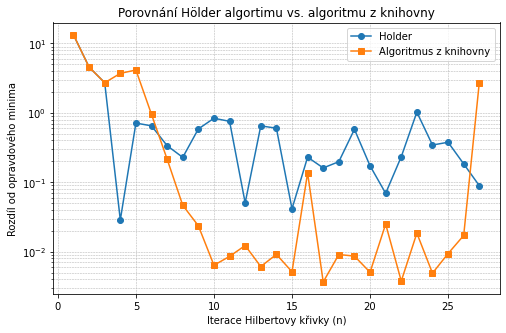

In [14]:
H = 2 * 1.4142 * 5**(1/2)
r = 1.1
eps = 1e-5
N_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
max_iter = 200

df = h2d.compare_algorithms(H, r, eps, max_iter,N_vals,-5,5,-5,5,1,0.0)

## Pro Matyasovu funkci

    Iterace n  Rozdíl Hoelder  Rozdíl alg z lib
0           1        0.961540          0.000000
1           2        0.240387          0.240385
2           3        0.060101          0.250003
3           4        0.015029          0.062507
4           5        0.003833          0.060096
5           6        0.001200          0.062527
6           7        0.000413          0.060189
7           8        0.000232          0.345950
8           9        0.000062          0.061891
9          10        0.000234          0.061022
10         11        0.000033          0.070131
11         12        0.001245          0.060193
12         13        0.001099          0.064508
13         14        0.002416          0.060652
14         15        0.001972          0.248869
15         16        0.001028          0.253885
16         17        0.000906          0.061283
17         18        0.000862          0.061468
18         19        0.000478          0.061292
19         20        0.000410          0

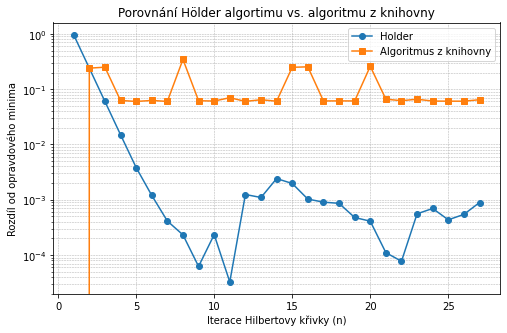

In [15]:
H = 2 * 1.4142 * 5**(1/2)
r = 1.1
eps = 1e-5
N_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
max_iter = 200

df = h2d.compare_algorithms(H, r, eps, max_iter,N_vals,-5,5,-5,5,2,0.0)

In [16]:
H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,10,20,21,22,23,24,25,26,27] 
max_iter = 100
print("Opravdové minimum f = 0.0")
for n in N:
    t_min, f_min, x_min, y_min = h2d.Holder_algorithm_mapped(H, r, eps, max_iter,n,-5,5,-5,5,1)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Opravdové minimum f = 0.0
Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (3.4008292305944003, 0.0)
  Hodnota f: 13.273978221149033
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (2.8927169045048284, 2.5)
  Hodnota f: 4.608709640881379
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (-2.5, 3.091412372729515)
  Hodnota f: 2.7541426183213624
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (-3.75, -3.2785089872662354)
  Hodnota f: 0.046661783725520156
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (3.700089755958267, -1.875)
  Hodnota f: 0.7118409466027372
----------------------------------------
Iterace hilbertovy křivky: 6
  Souřadnice (x,y): (2.8125, 1.8310931958121301)
  Hodnota f: 2.28100629228529
----------------------------------------
Iterace hilbertovy křivky: 7
  Souřadnice (x,y): (2.9898656765158194, 2.265625)

In [17]:
H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,10,20,21,22,23,24,25,26,27] 
max_iter = 100
print("Opravdové minimum f = 0.0")
for n in N:
    t_min, f_min, x_min, y_min = h2d.Holder_algorithm_mapped(H, r, eps, max_iter,n,-10,10,-10,10,2)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Opravdové minimum f = 0.0
Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (-10.0, -9.235904673967793)
  Hodnota f: 3.8461607030758245
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (-5.0, -4.621996960729415)
  Hodnota f: 0.9615498295473106
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (-2.5, -2.2765438283894213)
  Hodnota f: 0.240636874602965
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (-1.25, -1.1883600986207554)
  Hodnota f: 0.06040586906596901
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (-0.625, -0.6114468179291954)
  Hodnota f: 0.01533392952173343
----------------------------------------
Iterace hilbertovy křivky: 6
  Souřadnice (x,y): (-0.3125, -0.2001663577454238)
  Hodnota f: 0.00578297973918436
----------------------------------------
Iterace hilbertovy křivky: 7
  Souřadnice (x,y): (-0.15625, -0.0919

## Vykreslení grafů Hilbertovy křivky

Bod na aproximačním polygonu: [0.2   0.375]


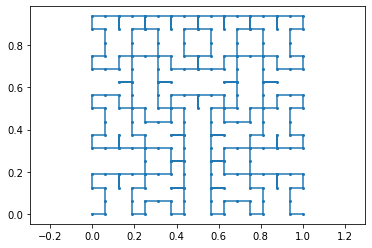

[1. 0.]


In [18]:
n = 4 
t = 0.2  

bod_na_polygonu = h2d.hilbert_polygon_point(t,n)
print("Bod na aproximačním polygonu:", bod_na_polygonu)

h2d.plot_hilbert_polygon(n)  
print(h2d.hilbert_polygon_point(1.0,n))

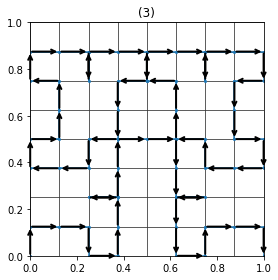

In [19]:
h2d.plot_multiple_hilberts_arrows([3])

## Vykreslení grafů pro Hilbertovu křivku s posunutím

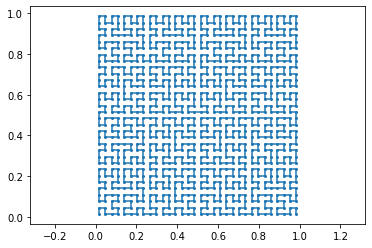

In [20]:
h2da = Hilbert2D(15)
h2da.plot_mainstream_hilbert_polygon(5)  


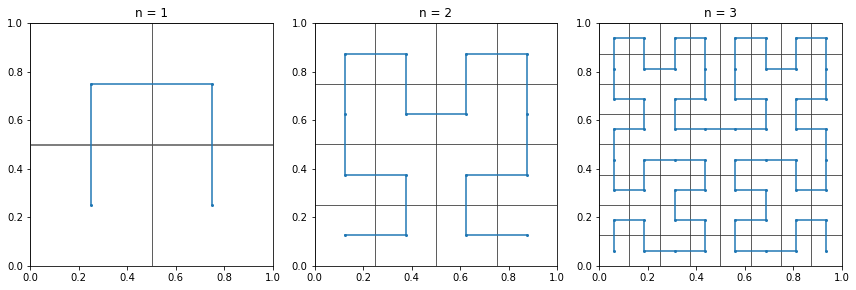

In [21]:
h2da.plot_multiple_hilberts([1, 2, 3])

# 3D Hilbertova křivka

## Test mezivýpočtů bodu křivky

In [22]:
h3d = Hilbert3D(20)


h2d_converter = Hilbert3D(20)
L = h2d_converter.dec_to_octal(0.2)
print("Octal L:", L)

h = [2, 0, 6]
result = h3d.ThreeD_Hilbert(h)
print("3D result:", result)




Octal L: [1, 4, 6, 3, 1, 4, 6, 3, 1, 4, 6, 3, 1, 4, 6, 3, 1, 5, 0, 0]
3D result: [0.625 0.75  0.125]


## Hledání minima za pomoci algoritmu z knihovny scipy.optimize

In [23]:
for n in [2,3,4,5,6,7,8]:
    h3d = Hilbert3D(10)
    t_min, h_min, f_min = h3d.find_minimum(n)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}, {h_min[2]:.4f}),  f = {f_min:.6f}")

precision=  2  =>  t = 0.237500,  h(t) = (0.5000, 0.7000, 0.0000),  f = 1.020000
precision=  3  =>  t = 0.236326,  h(t) = (0.3752, 0.7500, 0.0000),  f = 1.004074
precision=  4  =>  t = 0.236768,  h(t) = (0.3125, 0.7000, 0.0000),  f = 1.000078
precision=  5  =>  t = 0.236084,  h(t) = (0.3750, 0.6874, 0.0000),  f = 1.002891
precision=  6  =>  t = 0.236789,  h(t) = (0.2812, 0.7011, 0.0000),  f = 1.000176
precision=  7  =>  t = 0.237254,  h(t) = (0.3281, 0.6472, 0.0078),  f = 1.009602
precision=  8  =>  t = 0.237254,  h(t) = (0.3292, 0.6484, 0.0039),  f = 1.005662


## Hledání minima pomocí Hoelderovského algoritmu

In [24]:
h3d = Hilbert3D(50)


H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,13,15,16] 
max_iter = 250

for n in N:
    t_min, f_min, x_min, y_min, z_min = h3d.Holder_algorithm(H, r, eps, max_iter,n)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min}, {z_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (0.2996653785872082, 0.5, 0.0)
  Hodnota f: 1.020000055985745
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (0.0, 0.7002308730526581, 0.0)
  Hodnota f: 1.0450000266511832
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (0.375146432837278, 0.75, 0.0)
  Hodnota f: 1.0040734931840838
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (0.3125, 0.6995332689602733, 0.0)
  Hodnota f: 1.0000782339189318
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (0.29881784943171397, 0.6875, 0.0)
  Hodnota f: 1.0000788237399831
----------------------------------------
Iterace hilbertovy křivky: 6
  Souřadnice (x,y): (0.21875, 0.6875, 0.011811472835120185)
  Hodnota f: 1.0151903790851202
----------------------------------------
Iterace hilbertovy křivky: 7
  Souřadnice (x,y): (0.373644506634718

## Vykreslení grafu pro 3D křivku

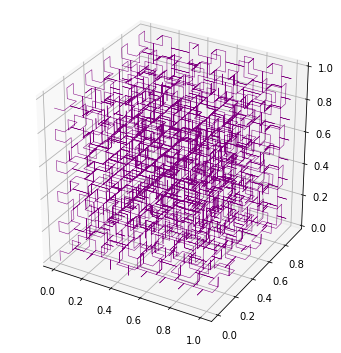

In [25]:
hilbert = Hilbert3D(10)
hilbert.plot_hilbert_polygon(4)


## Graf posunuté 3D H. křivky

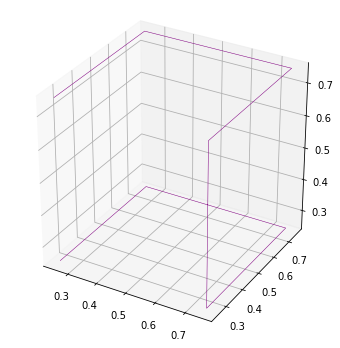

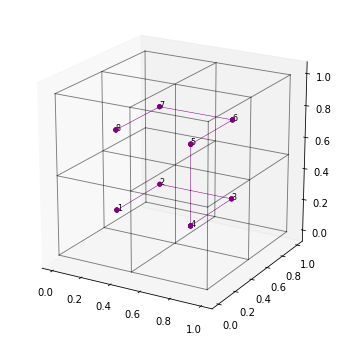

In [26]:
hilbert.plot_mainstream_hilbert(1)
hilbert.plot_mainstream_hilbert_cubes(1)